In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def _k_means_clustering(X, k):
    N, D = X.shape
    means = X[np.random.choice(N, size=k, replace=False)]

    def calc_labels(): 
        distances = ((X.reshape(N, 1, -1) - means.reshape(1, k, -1)) ** 2).sum(axis=-1)
        return distances.argmin(axis=-1), distances.min(axis=-1).sum()
        
    def calc_means():
        sums = np.zeros((k, D))
        np.add.at(sums, labels, X)
        return sums / np.bincount(labels).reshape(k, -1)

    labels, squared_sum = calc_labels()
    while True:
        means = calc_means()
        new_labels, new_squared_sum = calc_labels()
        if np.all(labels == new_labels):
            return labels, squared_sum

        labels, squared_sum = new_labels, new_squared_sum

In [3]:
def k_means_clustering(X, k, num_runs=100):
    labels = np.zeros((X.shape[0]))
    squared_sum = float('inf')
    for _ in range(num_runs):
        curr_labels, curr_squared_sum = _k_means_clustering(X, k)
        if curr_squared_sum < squared_sum:
            labels, squared_sum = curr_labels, curr_squared_sum

    return labels, squared_sum

In [4]:
def make_scatterplot(X, hue=None):
    if hue is not None:
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hue, alpha=.5, palette='Set1')
        plt.legend().remove()
    else:
        sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=.5)

In [5]:
from sklearn.datasets import make_blobs

In [6]:
# Make the dataset
np.random.seed(42)
cluster_sizes = 90 + 10 * np.random.beta(2, 5, size=5).astype('int')
X, y = make_blobs(n_samples=cluster_sizes, cluster_std=2.1, random_state=42)

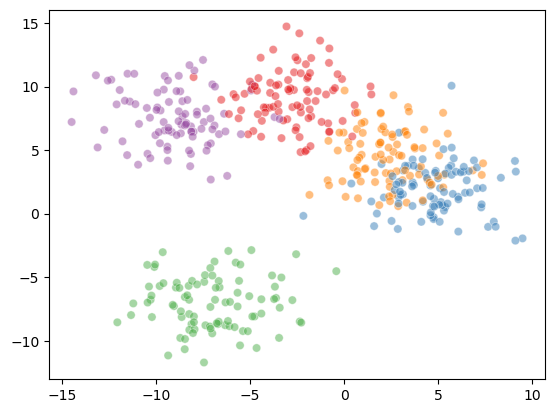

In [7]:
make_scatterplot(X, y)

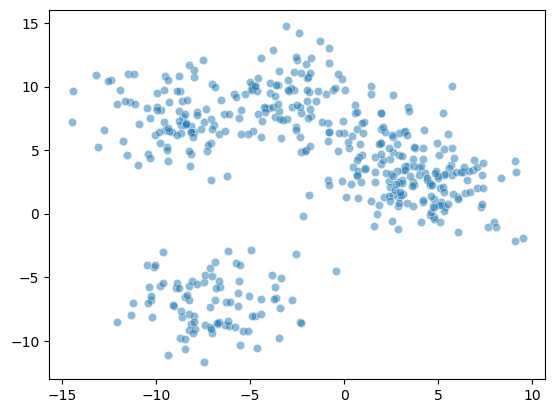

In [8]:
make_scatterplot(X)

squared_sum = 4042.7812635021437


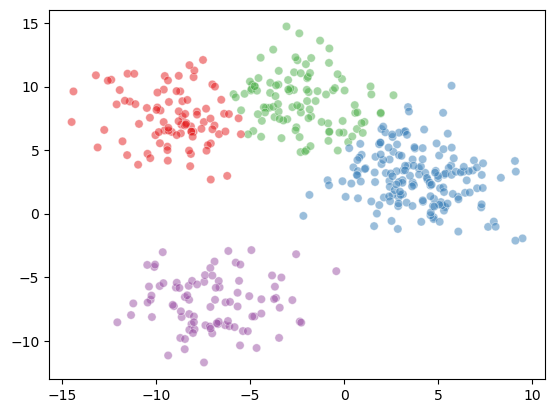

In [9]:
labels, squared_sum = k_means_clustering(X, 4)
print(f'squared_sum = {squared_sum}')
make_scatterplot(X, labels)

<Axes: >

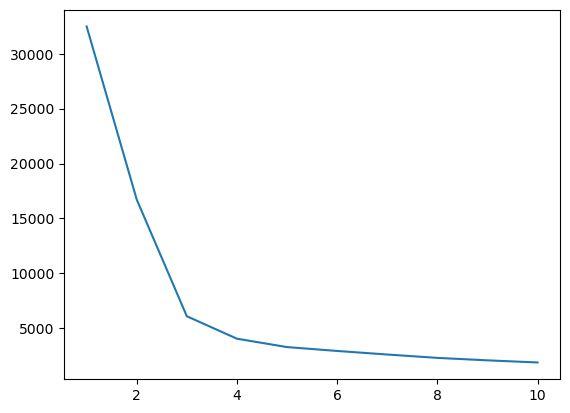

In [10]:
ks = np.arange(1, 11)
squared_sums = np.array([k_means_clustering(X, k)[1] for k in ks])
sns.lineplot(x=ks, y=squared_sums)